In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt

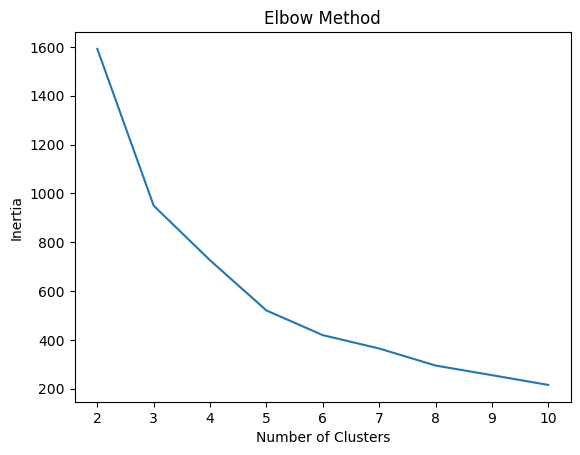

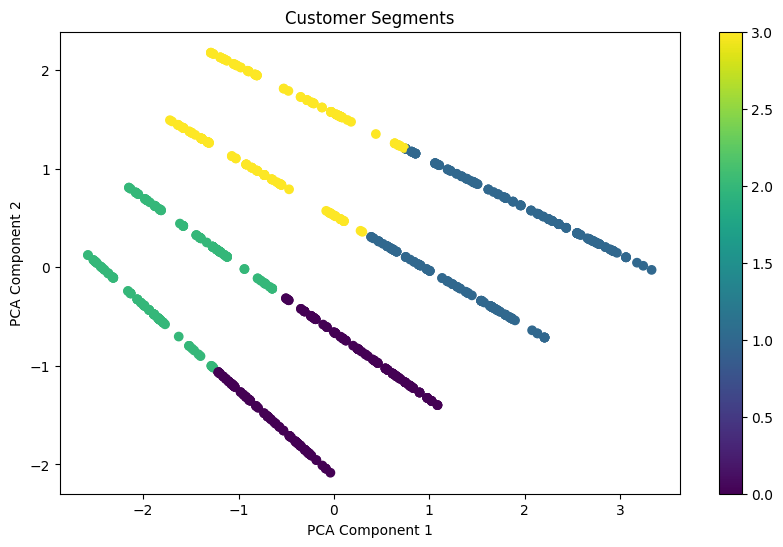

DB Index: 0.7524035871577834
Silhouette Score: 0.46718835465105685
Cluster Centroids: [[-0.93284071 -0.24260926  0.76038616]
 [ 0.88762036  1.24889798  0.70392056]
 [-0.90630803 -1.00001831 -1.01517061]
 [ 0.83755891 -0.57125326 -1.09677738]]


In [6]:

# Step 1: Load the data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Step 2: Data Preprocessing
# Combine customer profile data and transaction data
# For example, merge them on Customer ID if available
data = pd.merge(customers, transactions, on="CustomerID")

# Handle missing data, encoding categorical variables, etc.
# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# Step 3: Choose the number of clusters (k)
# Use Elbow Method to find optimal k
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow method plot
plt.plot(range(2, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 4: Fit KMeans clustering model
kmeans = KMeans(n_clusters=4)  # You can choose k=4 or any value from your elbow method
clusters = kmeans.fit_predict(scaled_data)

# Step 5: Calculate metrics
db_index = davies_bouldin_score(scaled_data, clusters)
silhouette = silhouette_score(scaled_data, clusters)

# Step 6: Visualize the clusters
# Reduce dimensions for visualization (PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plotting the clusters with matplotlib
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a color bar to show cluster numbers
plt.colorbar(scatter)
plt.show()

# Print results
print(f"DB Index: {db_index}")
print(f"Silhouette Score: {silhouette}")

# You can also display the cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster Centroids:", centroids)
